# Urban Air Pollution Challenge


## Upload the data

In [1]:
import sys
print(sys.executable)

/home/ilaria/Data Science/Bootcamp/.venv/bin/python


In [51]:
# Import of relevant packages
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error,r2_score

from sklearn.linear_model import LinearRegression

In [3]:
# Upload Train data
df_train=pd.read_csv('data/Train.csv')

# Upload Test data
df_test=pd.read_csv('data/Test.csv')

In [4]:
df_train.columns

Index(['Place_ID X Date', 'Date', 'Place_ID', 'target', 'target_min',
       'target_max', 'target_variance', 'target_count',
       'precipitable_water_entire_atmosphere',
       'relative_humidity_2m_above_ground',
       'specific_humidity_2m_above_ground', 'temperature_2m_above_ground',
       'u_component_of_wind_10m_above_ground',
       'v_component_of_wind_10m_above_ground',
       'L3_NO2_NO2_column_number_density',
       'L3_NO2_NO2_slant_column_number_density',
       'L3_NO2_absorbing_aerosol_index', 'L3_NO2_cloud_fraction',
       'L3_NO2_sensor_altitude', 'L3_NO2_sensor_azimuth_angle',
       'L3_NO2_sensor_zenith_angle', 'L3_NO2_solar_azimuth_angle',
       'L3_NO2_solar_zenith_angle',
       'L3_NO2_stratospheric_NO2_column_number_density',
       'L3_NO2_tropopause_pressure',
       'L3_NO2_tropospheric_NO2_column_number_density',
       'L3_O3_O3_column_number_density', 'L3_O3_O3_effective_temperature',
       'L3_O3_cloud_fraction', 'L3_O3_sensor_azimuth_angle',
   

In [5]:
df_train.head(10)

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,23.0,53.0,769.50,92,11.000000,60.200001,...,38.593017,-61.752587,22.363665,1793.793579,3227.855469,0.010579,74.481049,37.501499,-62.142639,22.545118
1,010Q650 X 2020-01-03,2020-01-03,010Q650,39.0,25.0,63.0,1319.85,91,14.600000,48.799999,...,59.624912,-67.693509,28.614804,1789.960449,3384.226562,0.015104,75.630043,55.657486,-53.868134,19.293652
2,010Q650 X 2020-01-04,2020-01-04,010Q650,24.0,8.0,56.0,1181.96,96,16.400000,33.400002,...,49.839714,-78.342701,34.296977,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,010Q650 X 2020-01-05,2020-01-05,010Q650,49.0,10.0,55.0,1113.67,96,6.911948,21.300001,...,29.181258,-73.896588,30.545446,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,010Q650 X 2020-01-06,2020-01-06,010Q650,21.0,9.0,52.0,1164.82,95,13.900001,44.700001,...,0.797294,-68.612480,26.899694,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,010Q650 X 2020-01-07,2020-01-07,010Q650,28.0,10.0,52.0,1053.22,94,14.600000,42.200001,...,30.605176,-62.134264,23.419991,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,010Q650 X 2020-01-08,2020-01-08,010Q650,21.0,6.0,51.0,1239.66,96,15.600000,47.100002,...,60.866484,-71.908414,32.348835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,010Q650 X 2020-01-09,2020-01-09,010Q650,18.0,6.0,28.0,307.93,93,18.600000,62.400002,...,59.674296,-60.765053,26.396956,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,010Q650 X 2020-01-10,2020-01-10,010Q650,21.0,15.0,33.0,305.92,95,11.800000,39.000000,...,37.176703,-73.812750,31.707143,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,010Q650 X 2020-01-11,2020-01-11,010Q650,24.0,16.0,32.0,279.19,85,10.396144,33.100002,...,10.016394,-68.586306,28.090359,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Split into train and validation set


In [6]:
# separate columns in target values, 'id' and numerical features
target_vars = ['target', 'target_min', 'target_max', 'target_variance', 'target_count']
id_cols = ['Place_ID', 'Date']
num_cols = [col for col in df_train.columns if col not in target_vars + id_cols and pd.api.types.is_numeric_dtype(df_train[col])]

In [7]:
X = df_train.drop(target_vars, axis=1)
Y = df_train['target']

X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.20, random_state=42)

In [8]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24445 entries, 6892 to 23654
Data columns (total 77 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Place_ID X Date                                      24445 non-null  object 
 1   Date                                                 24445 non-null  object 
 2   Place_ID                                             24445 non-null  object 
 3   precipitable_water_entire_atmosphere                 24445 non-null  float64
 4   relative_humidity_2m_above_ground                    24445 non-null  float64
 5   specific_humidity_2m_above_ground                    24445 non-null  float64
 6   temperature_2m_above_ground                          24445 non-null  float64
 7   u_component_of_wind_10m_above_ground                 24445 non-null  float64
 8   v_component_of_wind_10m_above_ground                 24445 non-null 

## Data cleaning and feature engineering

In [9]:
# Check the number of nans for each column
missing = pd.DataFrame(X_train.isnull().sum(), columns=["Amount"])
missing['Percentage'] = round((missing['Amount']/X_train.shape[0])*100, 2)
missing[missing['Amount'] != 0]

,Amount,Percentage
L3_NO2_NO2_column_number_density,1729,7.07
L3_NO2_NO2_slant_column_number_density,1729,7.07
L3_NO2_absorbing_aerosol_index,1729,7.07
L3_NO2_cloud_fraction,1729,7.07
L3_NO2_sensor_altitude,1729,7.07
...,...,...
L3_CH4_aerosol_optical_depth,19823,81.09
L3_CH4_sensor_azimuth_angle,19823,81.09
L3_CH4_sensor_zenith_angle,19823,81.09
L3_CH4_solar_azimuth_angle,19823,81.09


In [10]:
cols = X_train.columns[X.isna().sum() > 20000].tolist()

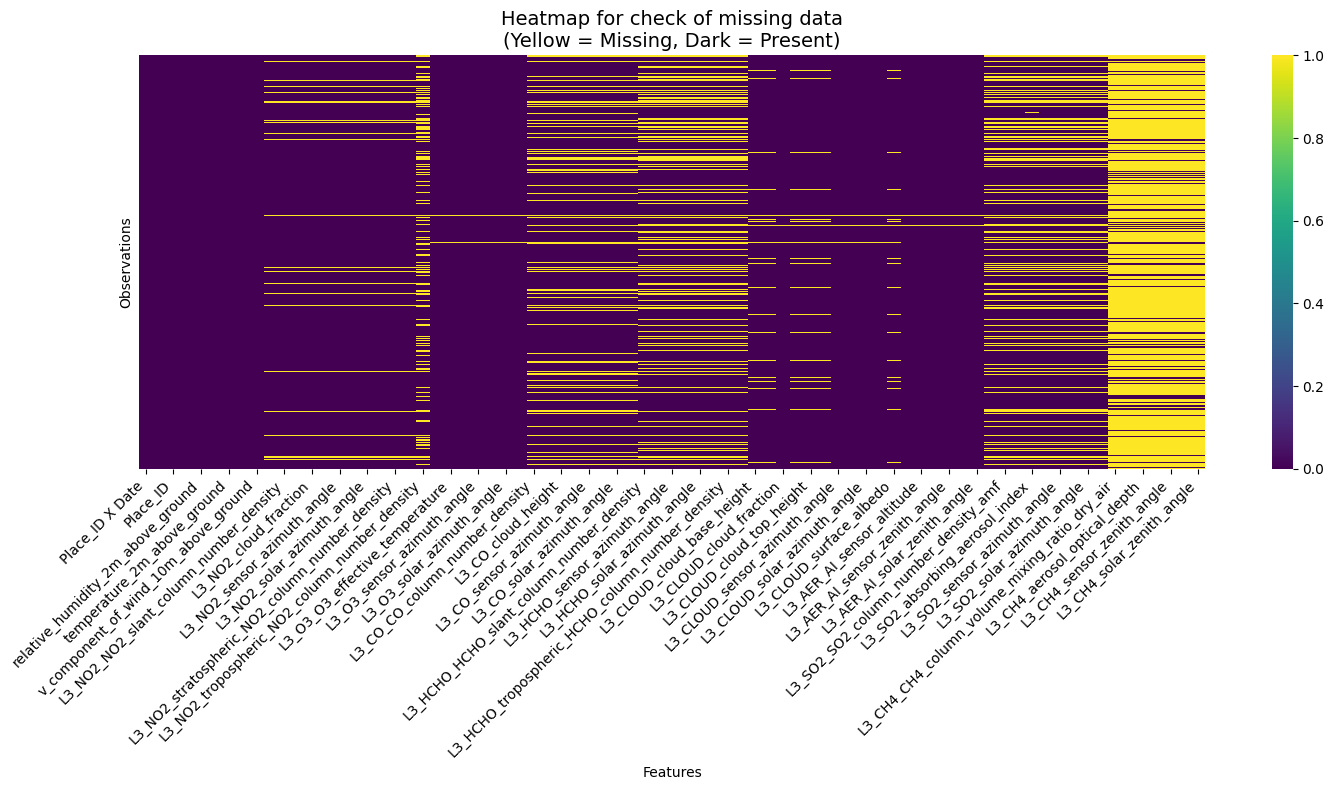

In [11]:
# Create missing data heatmap
plt.figure(figsize=(15, 8))

missing_data = X_train.isnull()
sns.heatmap(missing_data, yticklabels=False, cbar=True, cmap='viridis')
plt.title('Heatmap for check of missing data\n(Yellow = Missing, Dark = Present)', fontsize=14)
plt.xlabel('Features')
plt.ylabel('Observations')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

We remove all columns with more than 50% of missing data, which here are the columns with missing data>20000

In [12]:
X_train = X_train.drop(columns = cols)

X_train = X_train.reset_index(drop=True)

In [13]:
X_train = X_train.drop('Place_ID X Date', axis = 1)

In [14]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24445 entries, 0 to 24444
Data columns (total 69 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Date                                                 24445 non-null  object 
 1   Place_ID                                             24445 non-null  object 
 2   precipitable_water_entire_atmosphere                 24445 non-null  float64
 3   relative_humidity_2m_above_ground                    24445 non-null  float64
 4   specific_humidity_2m_above_ground                    24445 non-null  float64
 5   temperature_2m_above_ground                          24445 non-null  float64
 6   u_component_of_wind_10m_above_ground                 24445 non-null  float64
 7   v_component_of_wind_10m_above_ground                 24445 non-null  float64
 8   L3_NO2_NO2_column_number_density                     22716 non-nul

In [15]:
X_train.describe()

,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,...,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle
count,24445.000000,24445.000000,24445.000000,24445.000000,24445.000000,24445.000000,22716.000000,22716.000000,22716.000000,22716.000000,...,24283.000000,18690.000000,18690.000000,18690.000000,18635.000000,18690.000000,18690.000000,18690.000000,18690.000000,18690.000000
mean,15.336381,70.562947,0.006017,9.349889,0.414924,0.072386,0.000094,0.000163,-1.095917,0.278354,...,48.691044,0.000110,0.429034,0.000031,-1.945865,0.214337,-14.259942,35.603071,-123.650853,46.475245
std,10.716149,18.802477,0.003792,9.321077,2.706661,2.643526,0.000095,0.000109,0.612198,0.301640,...,14.307077,0.000928,0.251294,0.000172,0.710394,0.157834,76.045867,18.934930,71.750360,14.627388
min,0.420044,5.128572,0.000139,-34.647879,-15.559646,-15.023647,-0.000051,0.000000,-3.941742,0.000000,...,8.251382,-0.038756,0.000000,-0.004309,-4.825068,0.000000,-111.997123,0.000000,-179.880630,0.000000
25%,7.700000,58.600002,0.003410,3.150615,-1.092056,-1.431460,0.000056,0.000122,-1.516603,0.026806,...,38.277836,-0.000108,0.252271,-0.000043,-2.376181,0.077493,-97.721266,19.466335,-165.724037,36.613506
50%,12.281111,74.112502,0.004921,8.477583,0.224434,0.002605,0.000075,0.000150,-1.168067,0.150272,...,48.937301,0.000055,0.378349,0.000022,-1.964835,0.191302,-14.437552,37.982558,-156.506063,47.403793
75%,19.900000,85.500000,0.007587,16.282930,1.763406,1.537752,0.000111,0.000189,-0.746737,0.468959,...,59.281557,0.000280,0.551843,0.000097,-1.554452,0.345025,69.571461,52.220300,-118.295971,57.384903
max,72.599998,100.000000,0.021615,37.437921,17.955124,13.727925,0.002998,0.002431,4.824802,1.000000,...,87.491086,0.026994,2.137385,0.006988,3.736877,0.618176,80.544067,66.111289,179.776125,79.631711


In [16]:
X_train['Date'].nunique()

94

In [30]:
X_train['L3_SO2_SO2_column_number_density']

0        0.000160
1       -0.000176
2        0.000183
3       -0.000529
4        0.001043
           ...   
24440    0.000395
24441   -0.000138
24442         NaN
24443   -0.000001
24444         NaN
Name: L3_SO2_SO2_column_number_density, Length: 24445, dtype: float64

In [17]:
num_cols = [col for col in X_train.columns if col not in id_cols and pd.api.types.is_numeric_dtype(X_train[col])]

In [18]:
# define class to impute with mean by Place_ID
from sklearn.base import BaseEstimator, TransformerMixin

class GroupByPlaceIDImputer(BaseEstimator, TransformerMixin):
    def __init__(self, place_id='Place_ID', strategy='mean'):
        self.place_id = place_id
        self.strategy = strategy
    def fit(self, X, y=None):
        self.group_mean_ = X.groupby(self.place_id).transform(self.strategy)
        return self
    def transform(self, X):
        X_filled = X.copy()
        for col in X.columns:
            if col != self.place_id:
                mask = X_filled[col].isna()
                X_filled.loc[mask, col] = self.group_mean_.loc[mask, col]
        return X_filled.drop(columns=[self.place_id])

In [34]:
pipeline = Pipeline([
    ('groupby_imputer', GroupByPlaceIDImputer(place_id='Place_ID', strategy='mean')),
    ('simple_imputer', SimpleImputer(strategy='mean').set_output(transform='pandas')),
    ('std_scaler', StandardScaler())
])
preprocessor = ColumnTransformer([
    ('num', pipeline, ['Place_ID'] + num_cols),
], remainder='passthrough')

In [ ]:
# simple_imputer = SimpleImputer(strategy='mean').set_output(transform='pandas')


In [35]:
X_preprocessed = preprocessor.fit_transform(X_train)
X_preprocessed = pd.DataFrame(X_preprocessed, columns=num_cols + ['Date'])
X_preprocessed['Place_ID'] = X_train['Place_ID'].values

In [36]:
X_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24445 entries, 0 to 24444
Data columns (total 69 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   precipitable_water_entire_atmosphere                 24445 non-null  object
 1   relative_humidity_2m_above_ground                    24445 non-null  object
 2   specific_humidity_2m_above_ground                    24445 non-null  object
 3   temperature_2m_above_ground                          24445 non-null  object
 4   u_component_of_wind_10m_above_ground                 24445 non-null  object
 5   v_component_of_wind_10m_above_ground                 24445 non-null  object
 6   L3_NO2_NO2_column_number_density                     24445 non-null  object
 7   L3_NO2_NO2_slant_column_number_density               24445 non-null  object
 8   L3_NO2_absorbing_aerosol_index                       24445 non-null  object


In [37]:
X_preprocessed.isna().sum()

precipitable_water_entire_atmosphere    0
relative_humidity_2m_above_ground       0
specific_humidity_2m_above_ground       0
temperature_2m_above_ground             0
u_component_of_wind_10m_above_ground    0
                                       ..
L3_SO2_sensor_zenith_angle              0
L3_SO2_solar_azimuth_angle              0
L3_SO2_solar_zenith_angle               0
Date                                    0
Place_ID                                0
Length: 69, dtype: int64

## EDA

In [25]:
df_preprocessed.shape

(30557, 74)

In [26]:
print(df_preprocessed.columns)

Index(['precipitable_water_entire_atmosphere',
       'relative_humidity_2m_above_ground',
       'specific_humidity_2m_above_ground', 'temperature_2m_above_ground',
       'u_component_of_wind_10m_above_ground',
       'v_component_of_wind_10m_above_ground',
       'L3_NO2_NO2_column_number_density',
       'L3_NO2_NO2_slant_column_number_density',
       'L3_NO2_absorbing_aerosol_index', 'L3_NO2_cloud_fraction',
       'L3_NO2_sensor_altitude', 'L3_NO2_sensor_azimuth_angle',
       'L3_NO2_sensor_zenith_angle', 'L3_NO2_solar_azimuth_angle',
       'L3_NO2_solar_zenith_angle',
       'L3_NO2_stratospheric_NO2_column_number_density',
       'L3_NO2_tropopause_pressure',
       'L3_NO2_tropospheric_NO2_column_number_density',
       'L3_O3_O3_column_number_density', 'L3_O3_O3_effective_temperature',
       'L3_O3_cloud_fraction', 'L3_O3_sensor_azimuth_angle',
       'L3_O3_sensor_zenith_angle', 'L3_O3_solar_azimuth_angle',
       'L3_O3_solar_zenith_angle', 'L3_CO_CO_column_number_densi

In [27]:
# X = 

### Correlations between Pollutants and Target (PM2.5)


In [28]:
# Define pollutant columns
pollutants = [
    'L3_NO2_NO2_column_number_density',
    'L3_O3_O3_column_number_density',
    'L3_CO_CO_column_number_density',
    'L3_CO_H2O_column_number_density',
    'L3_SO2_SO2_column_number_density'
]

target = 'target'

# Rename pollutants for better readability
# pollutant_names = ['NO₂', 'O₃', 'CO', 'CO-H₂O', 'SO₂'] 

# Calculate correlation with target
correlations = df_preprocessed[pollutants].corrwith(df_preprocessed[target]).sort_values(ascending=False)
print("Correlations between pollutants and PM2.5:")
print(correlations)

# Correlation Matrix Heatmap
plt.figure(figsize=(10, 8))
corr_matrix = df_preprocessed[[target] + pollutants].corr()

# Create a mapping for renaming columns and index
# column_mapping = dict(zip(pollutants, pollutant_names))
# column_mapping[target] = 'PM2.5 Target'

# Rename the correlation matrix columns and index
# corr_matrix_renamed = corr_matrix.rename(columns=column_mapping, index=column_mapping)

# Create a mask for the upper triangle to show only lower triangle (stairs effect)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)

sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', center=0, 
            fmt='.3f', square=True, linewidths=2, cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1, mask=mask)
plt.title('Correlation Matrix: Pollutants & PM2.5', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

AttributeError: 'float' object has no attribute 'shape'

## Trainining the model

In [46]:
# Convert Date to datetime
X_preprocessed['Date'] = pd.to_datetime(X_preprocessed['Date'])
X_val['Date'] = pd.to_datetime(X_val['Date'])

In [47]:
X_preprocessed = X_preprocessed.drop(['Place_ID','Date'], axis=1)

In [44]:
## in order to exemplify how the predict will work, we will save the validation set
X_val.to_csv("data/X_val.csv")
y_val.to_csv("data/y_val.csv")

In [48]:
#training the model
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_preprocessed, y_train)

In [49]:
y_train_pred = reg.predict(X_preprocessed)
mse = mean_squared_error(y_train, y_train_pred)
print(mse)

1295.924207852959


In [53]:
rmse = np.sqrt(mse)
print(rmse)

35.99894731590021


In [55]:
r2 = r2_score(y_train, y_train_pred)
print(r2)

0.40956236672706914
